# Neural Network with TensorFlow

Langkah membuat Neural Network:

- Siapkan Data -> Fitur
  - Open/gather data
  - Preprocessing
  - Feature engineering
- Buat arsitektur NN
  - Sequential API
  - Functional API
- Compile (proses translate dari python ke bahasa mesin) model NN 
  - Tentukan Loss yang digunakan
  - Tentukan Optimizer
  - Tentukan metric yang ingin dimonitor
  - Callback
- Training

# Modeling with Titanic Data

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=46)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_col = ['Sex']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [ ]:
# ekstrak fiture
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(681, 7)
(76, 7)
(134, 7)


## Buat Arsitektur NN

### Sequential API

In [ ]:
# Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


"""
dengan FUNCTIONAL API
data_in = Input(shape=(7,1))
hidden_1 = Dense(4, activation='relu')(data_in)
out = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=data_in, outputs=out)
"""

# buat arsitekturnya
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(7,)))  # Hidden layer 1
model.add(Dense(1, activation='sigmoid'))  # Output layer

# compile
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',           # adam adalah optimizer paling modern
              metrics =['accuracy'])

# train
model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))  

Epoch 1/300
22/22 [==============================] - 4s 10ms/step - loss: 0.9613 - accuracy: 0.3113 - val_loss: 0.7953 - val_accuracy: 0.4474
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 0.9217 - accuracy: 0.3216 - val_loss: 0.7661 - val_accuracy: 0.4737
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8849 - accuracy: 0.3289 - val_loss: 0.7399 - val_accuracy: 0.4737
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8527 - accuracy: 0.3421 - val_loss: 0.7174 - val_accuracy: 0.5000
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.3612 - val_loss: 0.6970 - val_accuracy: 0.4737
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7990 - accuracy: 0.3862 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7770 - accuracy: 0.4537 - val_loss: 0.6625 - val_accuracy: 0.6053
Epoch 8/300


In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))  # untuk menyimpan nilai metric ke sebuah variable dengan bentuk dictionary

Epoch 1/300
22/22 [==============================] - 0s 5ms/step - loss: 0.4080 - accuracy: 0.8282 - val_loss: 0.4261 - val_accuracy: 0.8289
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8297 - val_loss: 0.4244 - val_accuracy: 0.8289
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8297 - val_loss: 0.4266 - val_accuracy: 0.8289
Epoch 4/300
22/22 [==============================] - 0s 11ms/step - loss: 0.4081 - accuracy: 0.8297 - val_loss: 0.4264 - val_accuracy: 0.8289
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8282 - val_loss: 0.4261 - val_accuracy: 0.8289
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8297 - val_loss: 0.4261 - val_accuracy: 0.8289
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8297 - val_loss: 0.4265 - val_accuracy: 0.8289
Epoch 8/300


In [ ]:
import pandas as pd
metrics = pd.DataFrame(history.history)   # di-convert ke dataframe
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.402725,0.831131,0.416068,0.815789
296,0.402678,0.831131,0.417132,0.815789
297,0.402840,0.829662,0.415852,0.815789
298,0.402675,0.831131,0.416191,0.815789
299,0.402506,0.831131,0.413778,0.815789


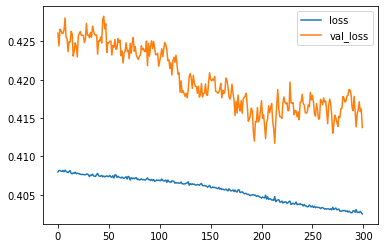

In [ ]:
metrics[['loss', 'val_loss']].plot();

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5,1,0)  # untuk mengubah hasil ke 0 atau 1.    Cara baca np.where seperti if pada excel. Jika memenuhi kondisi 0.5, maka diganti jadi 1, kalau tidak maka 0
y_pred.shape

(134, 1)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        76
           1       0.87      0.78      0.82        58

    accuracy                           0.85       134
   macro avg       0.85      0.84      0.85       134
weighted avg       0.85      0.85      0.85       134



In [ ]:
# to check GPU availability
import tensorflow as tf
tf.config.list_physical_devices('GPU')  

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# save model
model.save('nn_titanic')

INFO:tensorflow:Assets written to: nn_titanic/assets


In [ ]:
# load model
from tensorflow.keras.models import load_model

model_titanic = load_model('nn_titanic')

In [ ]:
res_model = model_titanic.predict(X_test)

In [ ]:
model_titanic.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


param = jumlah neuron di satu layer dikali jumlah neuron setelahnya

32 = neuron di input layer (7 + 1 bias) dikali neuron di hidden layer (4)

# Modeling with MNIST data

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 0 - 255    --> scaling pixel. karena max pixel itu 255
X_train = X_train / 255
X_test = X_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

def show_image(image):
  plt.imshow(image, cmap='binary')

5


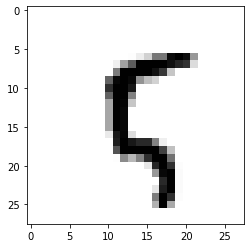

In [ ]:
show_image(X_train[100])
print(y_train[100])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=46)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# siapkan label dengan One Hot Encoding
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [ ]:
X_train.shape

(54000, 28, 28)

Ada 54,000 data/gambar/entri dengan ukuran 28x28

## Functional API

In [ ]:
# membuat model dengan Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

"""
contoh model sequential dengan arsiterktur yang sama

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(10, activation='softmax'))
"""

# deklarasi arsitektur
data_in = Input(shape=(28,28))
data_flat = Flatten()(data_in)     # mem-Flatten data yg tadinya 28x28 menjadi 784. ---- 784 dari 28 dikali 28
data_drop = Dropout(0.25)(data_flat)
hidden_1 = Dense(256, activation='elu')(data_flat)   # yg masuk ke hidden layer 1 adalah data_flat
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(32, activation='elu')(hidden_1)   # yg masuk ke hidden layer 2 adalah hidden_1
hidden_drop_2 = Dropout(0.25)(hidden_2)
out = Dense(10, activation='softmax')(hidden_2)    # yg masuk ke outer layer adalah hidden_2

model = Model(inputs=data_in, outputs=out)


# compile
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',               # adam adalah optimizer paling modern
              metrics =['accuracy'])

# train
model.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe)) 

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9214 - val_loss: 0.1406 - val_accuracy: 0.9580
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1271 - accuracy: 0.9611 - val_loss: 0.1016 - val_accuracy: 0.9698
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9733 - val_loss: 0.0805 - val_accuracy: 0.9752
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0728 - val_accuracy: 0.9798
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.0683 - val_accuracy: 0.9793
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0746 - val_accuracy: 0.9787
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0805 - val_accuracy:

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 32)                8224      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


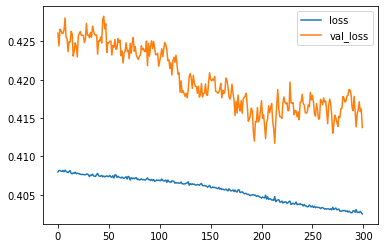

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[['loss','val_loss']].plot();

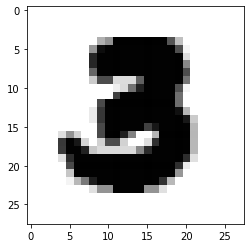

In [ ]:
new_data = X_test[200]

show_image(new_data)

In [ ]:
new_data.shape

(28, 28)

In [ ]:
# prediksi new data
res = model.predict(new_data.reshape(1, 28, 28))   # new data harus di-reshape dahulu menjadi tensor
res.argmax()

3

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Regression MLP // Regression Neural Network

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

## Sequential API

In [ ]:
# sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


# buat arsitektur
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))

# compile
model.compile(loss='mean_squared_error',
              optimizer = 'SGD',
              metrics = ['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7670 - accuracy: 0.0029 - val_loss: 11.2070 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.0029 - val_loss: 0.4569 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4449 - accuracy: 0.0029 - val_loss: 0.4050 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.0029 - val_loss: 0.4149 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.0029 - val_loss: 0.3886 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.0029 - val_loss: 0.3905 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.0029 - val_loss: 0.3910 - val_accuracy: 0.0044
Epoch

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 30)                270       
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


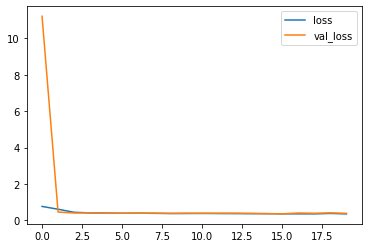

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[['loss','val_loss']].plot();

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5,1,0)  # untuk mengubah hasil ke 0 atau 1.    Cara baca np.where seperti if pada excel. Jika memenuhi kondisi 0.5, maka diganti jadi 1, kalau tidak maka 0

print(classification_report(y_test, y_pred))

ValueError: ignored